<a href="https://colab.research.google.com/github/always-reach/GAN/blob/main/gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from tensorflow.keras import Sequential,datasets
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,LeakyReLU,BatchNormalization,Reshape
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [28]:
class GAN():
  def __init__(self):
    #mnist画像の幅
    self.image_row=28
    #mnist画像の高さ
    self.image_col=28
    #mnist画像のチャンネル数
    self.channels=1
    self.image_shape=(self.image_row,self.image_col,self.channels)
    #入力ノイズの次元数
    self.z_input_dim=100
    #最適化アルゴリズムはAdam
    optimizer=Adam()

    self.discriminator=self.build_discriminator()
    self.discriminator.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=["accuracy"])

    self.generator=self.build_generator()
    self.combined=self.build_combined()

  def build_discriminator(self):
    image_shape=self.image_shape
    model=Sequential()
    #入力を平坦化
    model.add(Flatten(input_shape=image_shape))
    #全結合
    model.add(Dense(512))
    #LeakyReLU f(x)= ax(x<0) x(x>=0)
    model.add(LeakyReLU(alpha=0.1))
    #BatchNomalization
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))

    model.add(Dense(np.prod(self.image_shape),activation='tanh'))
    model.add(Reshape(self.image_shape))

    model.summary()
    return model

  def build_generator(self):
    noise_shape=(self.z_input_dim,)
    model=Sequential()
    model.add(Dense(256,input_shape=noise_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(self.image_shape),activation='tanh'))
    model.add(Reshape(self.image_shape))

    model.summary()
    return model

  def build_combined(self):
    self.discriminator.trainable=False
    model=Sequential([self.generator,self.discriminator])
    return model

  def train(self,epochs,batch_size=128,save_interval=50):
    (x_train,y_train),(x_test,y_test)=datasets.mnist.load_data()
    x_train=(x_train.astype(np.float32)-127.5)/127.5
    print("before expand_dims",x_train.shape)
    x_train=np.expand_dims(x_train,axis=3)
    print("after expand_dims",x_train.shape)

In [ ]:
#mnistのデータを取得
(_x_train_val, _y_train_val), (_x_test, _y_test) = datasets.mnist.load_data()
# 学習中の検証データがないので、train_test_split()を使って学習データ8割、検証データを2割に分割する。test_sizeが検証データの割合になっている。
_x_train, _x_val, _y_train, _y_val = train_test_split(_x_train_val, _y_train_val, test_size=0.2)
print(_x_train[0])
print("x_train   : ", _x_train.shape) # x_train   :  (48000, 28, 28)
print("y_train   : ", _y_train.shape) # y_train   :  (48000,)
print("x_val      : ", _x_val.shape) # x_val      :  (12000, 28, 28)
print("y_val      : ", _y_val.shape) # y_val      :  (12000,)
print("x_test    : ", _x_test.shape) # x_test    :  (10000, 28, 28)
print("y_test    : ", _y_test.shape) # y_test    :  (10000,)

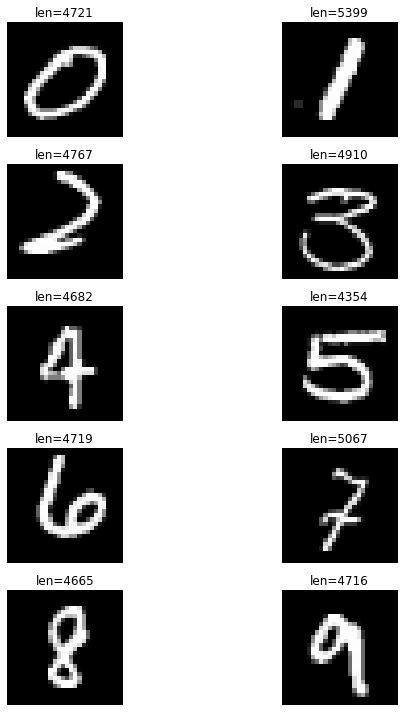

In [5]:
plt.figure(figsize=(10,10))

# MNISTの0から9の画像をそれぞれ表示する。
for i in range(10):
    data = [(x,t) for x, t in zip(_x_train, _y_train) if t == i]
    x, y = data[0]
    plt.subplot(5,2, i+1)
    # plt.title()はタイトルを表示する。ここでは画像枚数を表示している。
    plt.title("len={}".format(len(data)))
    # 画像を見やすいように座標軸を非表示にする。
    plt.axis("off")
    # 画像を表示
    plt.imshow(x, cmap='gray')

plt.tight_layout()
plt.show()

In [29]:
gan=GAN()
gan.train(epochs=100)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 512)               0         
                                                                 
 batch_normalization_17 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 1024)              525312    
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 1024)              0         
                                                     